# Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the files

In [3]:
assessments = pd.read_csv('anonymisedData/assessments.csv')
courses = pd.read_csv('anonymisedData/courses.csv')
studentAssessment = pd.read_csv('anonymisedData/studentAssessment.csv')
studentInfo = pd.read_csv('anonymisedData/studentInfo.csv')
studentRegistration = pd.read_csv('anonymisedData/studentRegistration.csv')
studentVle = pd.read_csv('anonymisedData/studentVle.csv', nrows=999999)
vle = pd.read_csv('anonymisedData/vle.csv')

# Identifying the columns 

In [4]:
set1 = list(assessments.columns.values)
set2 = list(courses.columns.values)
set3 = list(studentAssessment.columns.values)
set4 = list(studentInfo.columns.values)
set5 = list(studentRegistration.columns.values)
set6 = list(studentVle.columns.values)
set7 = list(vle.columns.values)

In [5]:
all_columns = [set1, set2, set3, set4, set5, set6, set7]
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
columns_header = ['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle' ] 

In [6]:
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Column Names,"Rows, Columns",Table Name
0,"[code_module, code_presentation, id_assessment, assessment_type, date, weight]","(206, 6)",assessments
1,"[code_module, code_presentation, module_presentation_length]","(22, 3)",courses
2,"[id_assessment, id_student, date_submitted, is_banked, score]","(173912, 5)",studentAssessment
3,"[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]","(32593, 12)",studentInfo
4,"[code_module, code_presentation, id_student, date_registration, date_unregistration]","(32593, 5)",studentRegistration
5,"[code_module, code_presentation, id_student, id_site, date, sum_click]","(999999, 6)",studentVle
6,"[id_site, code_module, code_presentation, activity_type, week_from, week_to]","(6364, 6)",vle


# Cleaning the data

In [7]:
# Dropping all the missing values
assessments.dropna(inplace=True)
courses.dropna(inplace=True)
studentAssessment.dropna(inplace=True)
studentInfo.dropna(inplace=True)
studentRegistration.dropna(inplace=True)
studentVle.dropna(inplace=True)
vle.dropna(inplace=True)

In [8]:
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Column Names,"Rows, Columns",Table Name
0,"[code_module, code_presentation, id_assessment, assessment_type, date, weight]","(195, 6)",assessments
1,"[code_module, code_presentation, module_presentation_length]","(22, 3)",courses
2,"[id_assessment, id_student, date_submitted, is_banked, score]","(173739, 5)",studentAssessment
3,"[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]","(31482, 12)",studentInfo
4,"[code_module, code_presentation, id_student, date_registration, date_unregistration]","(10033, 5)",studentRegistration
5,"[code_module, code_presentation, id_student, id_site, date, sum_click]","(999999, 6)",studentVle
6,"[id_site, code_module, code_presentation, activity_type, week_from, week_to]","(1121, 6)",vle


# Data Analysis - Based on Final Result

Analysis to understand the distribution of the Quasi-identifying attributes.[1] The 6 main attributes identified are gender, disability, age, highest education, region, imd band. These can be used to understand the final result.
 
[1] https://www.nature.com/articles/sdata2017171

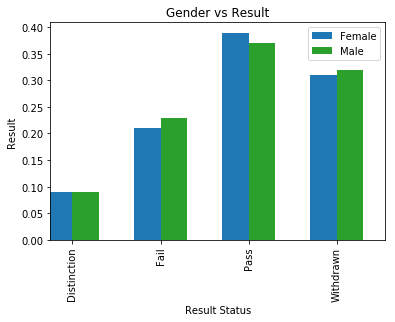

In [9]:
# Results based on Gender

gender = studentInfo.groupby(['gender'],as_index = False)
gender_count = gender['id_student'].count()
result_gender = studentInfo.groupby(['gender', 'final_result'],as_index = False)
result_gender_count = result_gender['id_student'].count()

merge = pd.merge(gender_count, result_gender_count, on = 'gender', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['gender','final_result', 'i']]

female = merge.loc[merge['gender'] == 'F']
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 

ax = fig.add_subplot(111) 

female.set_index('final_result',drop=True,inplace=True)
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar', ax=ax, width= 0.3, position=1)
male.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Gender vs Result')
plt.legend(['Female', 'Male'])
plt.show()

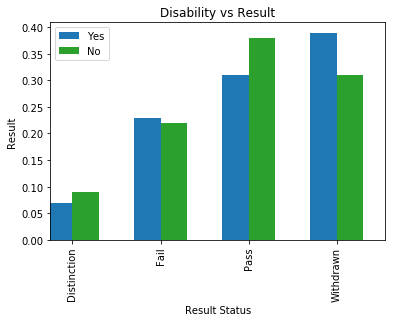

In [10]:
#Results based on Diasability

disability_ = studentInfo.groupby(['disability'],as_index = False)
disability_count = disability_['id_student'].count()
result_disability = studentInfo.groupby(['disability', 'final_result'],as_index = False)
result_disability_count = result_disability['id_student'].count()

merge = pd.merge(disability_count, result_disability_count, on = 'disability', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['disability','final_result', 'i']]

yes = merge.loc[merge['disability'] == 'Y']
no = merge.loc[merge['disability'] == 'N']

fig = plt.figure() 

ax = fig.add_subplot(111) 

yes.set_index('final_result',drop=True,inplace=True)
no.set_index('final_result',drop=True,inplace=True)
yes.plot(kind='bar', ax=ax, width= 0.3, position=1)
no.plot(kind='bar', color='#2ca02c', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Disability vs Result')
plt.legend(['Yes', 'No'])
plt.show()

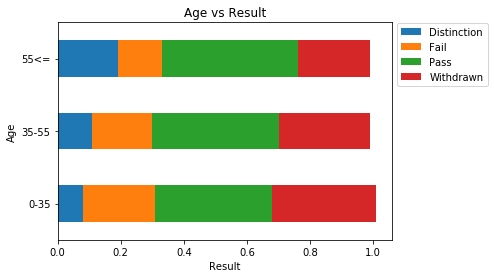

In [11]:
#Results based on Age

age = studentInfo.groupby(['age_band'],as_index = False)
age_count = age['id_student'].count()
result_age = studentInfo.groupby(['age_band', 'final_result'],as_index = False)
result_age_count = result_age['id_student'].count()

merge = pd.merge(age_count, result_age_count, on = 'age_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['age_band','final_result', '_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

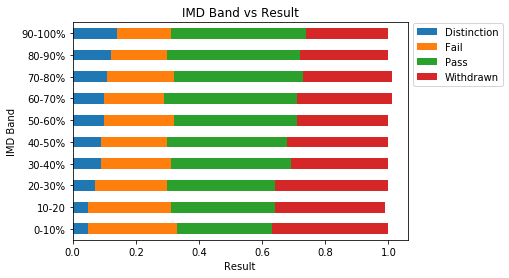

In [12]:
#Results based on IMD Band

import pandas as pd

imd = studentInfo.groupby(['imd_band'],as_index = False)
imd_count = imd['id_student'].count()
result_imd = studentInfo.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge = pd.merge(imd_count, result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh", stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Band')
plt.xlabel('Result')
plt.title('IMD Band vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

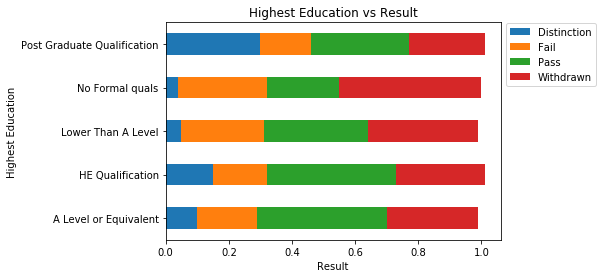

In [13]:
#Results based on Highest Education

education = studentInfo.groupby(['highest_education'],as_index = False)
education_count = education['id_student'].count()
result_education = studentInfo.groupby(['highest_education', 'final_result'],as_index = False)
result_education_count = result_education['id_student'].count()

merge = pd.merge(education_count, result_education_count , on = 'highest_education', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind = 'barh', stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Highest Education')
plt.xlabel('Result')
plt.title('Highest Education vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

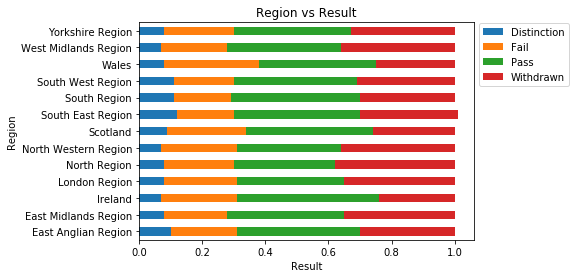

In [14]:
#Results based on Region

import pandas as pd

region = studentInfo.groupby(['region'],as_index = False)
region_count = region['id_student'].count()
result_region = studentInfo.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(region_count, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh", stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# Predictive Models

In [15]:
dfs = [studentAssessment, studentInfo, studentRegistration]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id_student'), dfs)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [16]:
df_final = df_final.drop(['date_unregistration'],axis =1) # too many NaN values

In [17]:
df_final.dropna(inplace=True)
df_final['final_result'].value_counts()

Withdrawn      32158
Pass            8643
Fail            4406
Distinction     1203
Name: final_result, dtype: int64

In [18]:
df_final.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module_x,code_presentation_x,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,date_registration
0,1752,65002,17,0,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0
1,1752,65002,17,0,66.0,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,AAA,2013J,-180.0
2,1753,65002,51,0,68.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0
3,1753,65002,51,0,68.0,AAA,2014J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail,AAA,2013J,-180.0
4,1758,65002,-1,1,66.0,AAA,2013J,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,AAA,2013J,-180.0


In [19]:
# Converting the final table to catgorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final = df_final.apply(le.fit_transform)

In [20]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Accuracy:0.952 



In [21]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='huber')
gb = gb.fit(xTrain, yTrain)
print("Accuracy:{0:.3f}".format(gb.score(xTest, yTest)))

Accuracy:0.895


In [22]:
# Random Forest
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

C:\Users\aishw\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy:0.978 



# Model Evaluation

In [23]:
# Function to plot accuracy

from sklearn.learning_curve import learning_curve
import numpy as np

def plot_accuracy(model):

    train_sizes, train_scores, test_scores = learning_curve(model, xTrain, yTrain, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim(0.0, 1.1)
    plt.title("Accuracy Plot")
    plt.xlabel("Testing")
    plt.ylabel("Accuracy %")

    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
        
    plt.plot(train_sizes, test_mean, 'bo-', color = "r", label="Test Score")


C:\Users\aishw\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


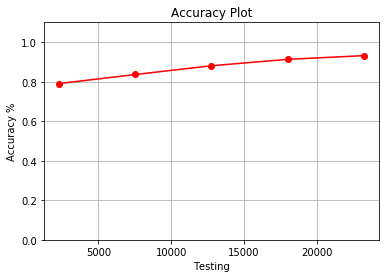

In [24]:
#Decision Tree
plot_accuracy(dt)

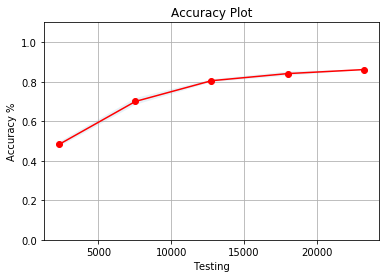

In [25]:
#Gradient Boosting
plot_accuracy(gb)

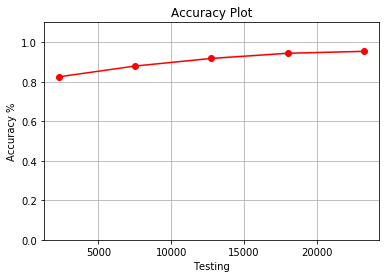

In [26]:
#Random Forest
plot_accuracy(rf)

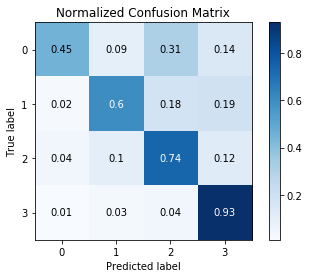

In [27]:
#Decision Tree
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()

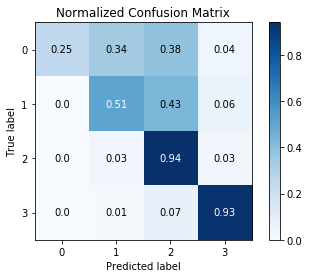

In [28]:
#Gradient Boosting
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(gb, xTest, yTest)
y_pred = np.absolute(y_pred)

skplt.metrics.plot_confusion_matrix(yTest, y_pred.round(), normalize=True)

plt.show()

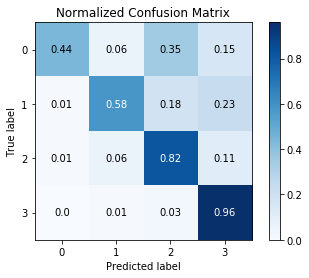

In [29]:
#Random Forest
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()